In [1]:
# Dependencies and Setup
import pandas as pd
import time
from us import states

In [2]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps

# Census & gmaps API Keys
from config import (census_key, gkey)
c = Census(census_key, year=2016)

# Configure gmaps
gmaps.configure(api_key=gkey)

In [3]:
# Converting CSV to DataFrame
file="Resources/Hospitalv2.csv"
hospital=pd.read_csv(file, converters={"ZIP Code": str, "Provider ID": str}) #contain hospital ID, name, and address
# converters= imports a specific column into a data type, in this case keep leading 0's for zip code

In [4]:
# to view zip code if kept leading zeros
# hospital["ZIP Code"].sort_values(ascending=True)
hospital.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'HCAHPS Measure ID', 'HCAHPS Question',
       'HCAHPS Answer Description', 'Patient Survey Star Rating',
       'Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent',
       'HCAHPS Answer Percent Footnote', 'HCAHPS Linear Mean Value',
       'Number of Completed Surveys', 'Number of Completed Surveys Footnote',
       'Survey Response Rate Percent', 'Survey Response Rate Percent Footnote',
       'Measure Start Date', 'Measure End Date'],
      dtype='object')

In [5]:
hospital_df=hospital[["Provider ID", "Hospital Name", "Address", "City", "State", "ZIP Code", "County Name"]]
hospital_df.head()


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON
4,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON


In [6]:
file1="Resources/zip_data_actual.csv"
# convert to pd DataFrame, convert column zip code from int to str
lat_lng=pd.read_csv(file1, converters={"ZIP Code": str})
lat_lng=lat_lng.drop(columns="Unnamed: 0")
lat_lng.head()

,ZIP Code,latitude,longitude,city,state,county
0,00501,40.922326,-72.637078,Holtsville,NY,Suffolk
1,00544,40.922326,-72.637078,Holtsville,NY,Suffolk
2,00601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
3,00602,18.393103,-67.180953,Aguada,PR,Aguada
4,00603,18.455913,-67.145780,Aguadilla,PR,Aguadilla


In [7]:
# check duplicates
# hospital_df["is_duplicate"]= hospital_df.duplicated()
# Provider_ID has duplicates, drop duplicate rows
hospital_df=hospital_df.drop_duplicates(["Provider ID"], keep="first")
hospital_df

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON
50,010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL
100,010006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE
150,010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON
200,010008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW
250,010011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,JEFFERSON
300,010012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB
350,010016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,SHELBY
400,010018,CALLAHAN EYE HOSPITAL,1720 UNIVERSITY BLVD,BIRMINGHAM,AL,35233,JEFFERSON
450,010019,HELEN KELLER MEMORIAL HOSPITAL,1300 SOUTH MONTGOMERY AVENUE,SHEFFIELD,AL,35660,COLBERT


In [8]:
# hospital_df has all the hospital information
# lat_lng has all the lat and lng info for each ZIP Code
# want to merge and add lat and lng information into hospital_df, primary key ZIP Code
# when one df has duplicate rows
results=pd.merge(hospital_df, lat_lng)[["Provider ID", "Hospital Name", "Address", "City", "State", "ZIP Code",
                                        "County Name", "latitude", "longitude"]]


In [9]:
# check to see duplicate ZIP Codes has the correct latitude and longitude
#results[["ZIP Code","latitude","longitude"]].sort_values(by="ZIP Code", ascending=True)

In [12]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "Name", "zip code tabulation area": "ZIP Code"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["ZIP Code", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate"]]

# Visualize
print(len(census_pd))
census_pd

33120


,ZIP Code,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,01001,17423.0,45.0,56714.0,30430.0,1462.0,8.391207
1,01002,29970.0,23.2,48923.0,26072.0,8351.0,27.864531
2,01003,11296.0,19.9,2499.0,3829.0,54.0,0.478045
3,01005,5228.0,44.1,70568.0,32169.0,230.0,4.399388
4,01007,14888.0,42.5,80502.0,36359.0,1410.0,9.470715
5,01008,1194.0,48.5,67250.0,34505.0,49.0,4.103853
6,01009,237.0,62.2,-666666666.0,26150.0,105.0,44.303797
7,01010,3718.0,46.6,83273.0,38693.0,95.0,2.555137
8,01011,1523.0,41.0,74722.0,29951.0,110.0,7.222587
9,01012,528.0,50.5,60417.0,34032.0,60.0,11.363636


In [13]:
# check for missing data in rows
census_pd.count()

ZIP Code             33120
Population           33120
Median Age           33120
Household Income     33120
Per Capita Income    32836
Poverty Count        33120
Poverty Rate         32799
dtype: int64

In [14]:
# remove those missing data rows
census_pd=census_pd.dropna(how="any")
census_pd.count()

ZIP Code             32515
Population           32515
Median Age           32515
Household Income     32515
Per Capita Income    32515
Poverty Count        32515
Poverty Rate         32515
dtype: int64

In [15]:
census_pd

,ZIP Code,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,01001,17423.0,45.0,56714.0,30430.0,1462.0,8.391207
1,01002,29970.0,23.2,48923.0,26072.0,8351.0,27.864531
2,01003,11296.0,19.9,2499.0,3829.0,54.0,0.478045
3,01005,5228.0,44.1,70568.0,32169.0,230.0,4.399388
4,01007,14888.0,42.5,80502.0,36359.0,1410.0,9.470715
5,01008,1194.0,48.5,67250.0,34505.0,49.0,4.103853
6,01009,237.0,62.2,-666666666.0,26150.0,105.0,44.303797
7,01010,3718.0,46.6,83273.0,38693.0,95.0,2.555137
8,01011,1523.0,41.0,74722.0,29951.0,110.0,7.222587
9,01012,528.0,50.5,60417.0,34032.0,60.0,11.363636


In [16]:
# results is list of hospital and some hospitals are in the same zip code. 
# will want ZIP Code column to be unique and add a new column of hospital count
# check to see if there are any rows with missing data
results.count()

Provider ID      4890
Hospital Name    4890
Address          4890
City             4890
State            4890
ZIP Code         4890
County Name      4875
latitude         4880
longitude        4880
dtype: int64

In [17]:
# drop the missing data rows
results=results.dropna(how="any")
results.count()

Provider ID      4865
Hospital Name    4865
Address          4865
City             4865
State            4865
ZIP Code         4865
County Name      4865
latitude         4865
longitude        4865
dtype: int64

In [18]:
# get count of hospitals per zip code
hospital_counts=results["ZIP Code"].value_counts()
hospital_counts

77030    7
48201    5
70508    5
76104    5
19104    5
75093    4
39301    4
60612    4
39216    4
72205    4
77479    4
73120    4
78229    4
63110    4
79902    4
35233    4
12208    3
99508    3
90033    3
71301    3
75231    3
93301    3
77598    3
77070    3
37129    3
46202    3
77090    3
12180    3
75235    3
25301    3
        ..
92801    1
80229    1
22191    1
87114    1
46975    1
43078    1
53534    1
51041    1
85234    1
46360    1
46714    1
59019    1
26757    1
67455    1
37074    1
95971    1
56278    1
64085    1
79331    1
30655    1
04614    1
92869    1
28501    1
19007    1
75203    1
77964    1
66547    1
34698    1
00921    1
80210    1
Name: ZIP Code, Length: 4420, dtype: int64

In [19]:
# convert it to a DataFrame
hospital_count_zip=pd.DataFrame(hospital_counts)
hospital_count_zip

,ZIP Code
77030,7
48201,5
70508,5
76104,5
19104,5
75093,4
39301,4
60612,4
39216,4
72205,4


In [20]:
# rename the column to Hospital Count
hospital_count_zip=hospital_count_zip.rename(columns={"ZIP Code":"Hospital Count"})
hospital_count_zip

,Hospital Count
77030,7
48201,5
70508,5
76104,5
19104,5
75093,4
39301,4
60612,4
39216,4
72205,4


In [21]:
# reset the index, so that zip code is a column and rename the column to ZIP Code
hospital_count_zip=hospital_count_zip.reset_index()
hospital_count_zip=hospital_count_zip.rename(columns={"index":"ZIP Code"})
hospital_count_zip

,ZIP Code,Hospital Count
0,77030,7
1,48201,5
2,70508,5
3,76104,5
4,19104,5
5,75093,4
6,39301,4
7,60612,4
8,39216,4
9,72205,4


In [22]:
type(hospital_count_zip)

pandas.core.frame.DataFrame

In [23]:
# merge the censu_pd dataframe with the hospital counts dataframe
hospital_count_by_zipcode=pd.merge(census_pd, hospital_count_zip, on="ZIP Code")
hospital_count_by_zipcode

,ZIP Code,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Hospital Count
0,01040,40280.0,34.4,38829.0,21897.0,11227.0,27.872393,1
1,01053,1697.0,49.8,66528.0,30391.0,251.0,14.790807,1
2,01060,15407.0,35.0,56128.0,35487.0,2258.0,14.655676,1
3,01069,8753.0,44.0,57994.0,30199.0,591.0,6.751971,1
4,01085,41479.0,39.0,63283.0,29597.0,3679.0,8.869548,1
5,01104,23183.0,35.2,28590.0,18983.0,7215.0,31.121943,2
6,01201,45001.0,43.4,45893.0,28433.0,7152.0,15.892980,1
7,01230,8195.0,49.4,59702.0,35371.0,439.0,5.356925,1
8,01301,17730.0,42.6,49024.0,28633.0,2217.0,12.504230,1
9,01331,13205.0,43.9,51750.0,25349.0,2020.0,15.297236,1


In [24]:
hospital_count_by_zipcode["Household Income"].max()

187670.0

In [25]:
#export hospital_count_by_zipcode to csv
hospital_count_by_zipcode.to_csv("output/hospital_count_by_zipcode.csv", encoding="utf-8", index=False)

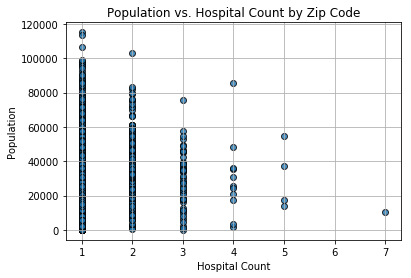

In [26]:
# build scatter plot
plt.scatter(hospital_count_by_zipcode["Hospital Count"], hospital_count_by_zipcode["Population"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="ZIP Code")
# graph properties
plt.title("Population vs. Hospital Count by Zip Code")
plt.xlabel("Hospital Count")
plt.ylabel("Population")
plt.grid(True)

# save figure
plt.savefig("output/population_hospital_count.png")

# show plot
plt.show()

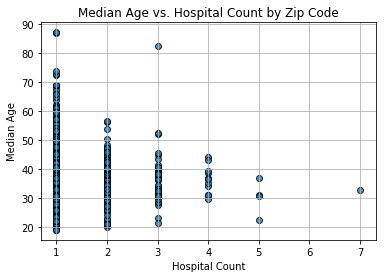

In [27]:
# build scatter plot
plt.scatter(hospital_count_by_zipcode["Hospital Count"], hospital_count_by_zipcode["Median Age"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="ZIP Code")
# graph properties
plt.title("Median Age vs. Hospital Count by Zip Code")
plt.xlabel("Hospital Count")
plt.ylabel("Median Age")
plt.grid(True)

# save figure
plt.savefig("output/median_age_hospital_count.png")

# show plot
plt.show()

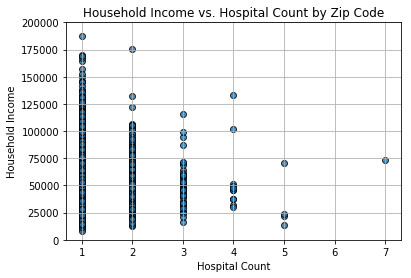

In [28]:
# build scatter plot
plt.scatter(hospital_count_by_zipcode["Hospital Count"], hospital_count_by_zipcode["Household Income"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="ZIP Code")
# graph properties
plt.title("Household Income vs. Hospital Count by Zip Code")
plt.xlabel("Hospital Count")
plt.ylabel("Household Income")
plt.grid(True)
plt.ylim(0,200000)

# save figure
plt.savefig("output/household_income_hospital_count.png")

# show plot
plt.show()

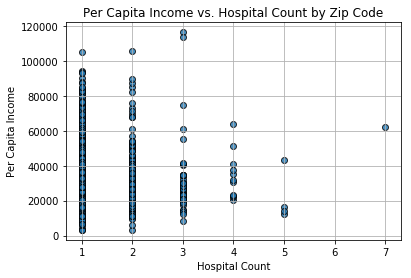

In [29]:
# build scatter plot
plt.scatter(hospital_count_by_zipcode["Hospital Count"], hospital_count_by_zipcode["Per Capita Income"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="ZIP Code")
# graph properties
plt.title("Per Capita Income vs. Hospital Count by Zip Code")
plt.xlabel("Hospital Count")
plt.ylabel("Per Capita Income")
plt.grid(True)

# save figure
plt.savefig("output/percapita_hospital_count.png")

# show plot
plt.show()

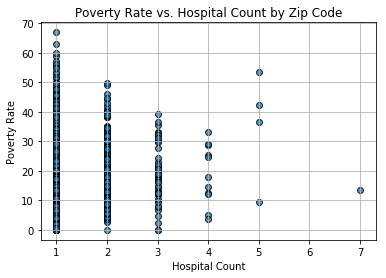

In [30]:
# build scatter plot
plt.scatter(hospital_count_by_zipcode["Hospital Count"], hospital_count_by_zipcode["Poverty Rate"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="ZIP Code")
# graph properties
plt.title("Poverty Rate vs. Hospital Count by Zip Code")
plt.xlabel("Hospital Count")
plt.ylabel("Poverty Rate")
plt.grid(True)

# save figure
plt.savefig("output/poverty_rate_hospital_count.png")

# show plot
plt.show()

In [31]:
# heatmap of poverty rate
# configure gmaps with API key
gmaps.configure(api_key=gkey)

In [32]:
hospital_heatmap=pd.merge(hospital_count_by_zipcode, lat_lng, on="ZIP Code")
hospital_heatmap

,ZIP Code,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Hospital Count,latitude,longitude,city,state,county
0,01040,40280.0,34.4,38829.0,21897.0,11227.0,27.872393,1,42.198291,-72.642070,Holyoke,MA,Hampden
1,01053,1697.0,49.8,66528.0,30391.0,251.0,14.790807,1,42.353838,-72.704385,Leeds,MA,Hampshire
2,01060,15407.0,35.0,56128.0,35487.0,2258.0,14.655676,1,42.415154,-72.769270,Northampton,MA,Hampshire
3,01069,8753.0,44.0,57994.0,30199.0,591.0,6.751971,1,42.176131,-72.314570,Palmer,MA,Hampden
4,01085,41479.0,39.0,63283.0,29597.0,3679.0,8.869548,1,42.148690,-72.501887,Westfield,MA,Hampden
5,01104,23183.0,35.2,28590.0,18983.0,7215.0,31.121943,2,42.128605,-72.567966,Springfield,MA,Hampden
6,01201,45001.0,43.4,45893.0,28433.0,7152.0,15.892980,1,42.479475,-73.248070,Pittsfield,MA,Berkshire
7,01230,8195.0,49.4,59702.0,35371.0,439.0,5.356925,1,42.299392,-73.266650,Great Barrington,MA,Berkshire
8,01301,17730.0,42.6,49024.0,28633.0,2217.0,12.504230,1,42.601335,-72.623619,Greenfield,MA,Franklin
9,01331,13205.0,43.9,51750.0,25349.0,2020.0,15.297236,1,42.547302,-72.183903,Athol,MA,Worcester


In [33]:
# pull lat and lng and poverty rate from hospital_heatmap dataframe
locations=hospital_heatmap[["latitude", "longitude"]].astype(float)
locations
print(len(locations))
poverty_rate=hospital_heatmap["Poverty Rate"].astype(float)
poverty_rate
print(len(poverty_rate))



4242
4242


In [34]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=poverty_rate, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [35]:
# Convert hospital rate to list
hospital_rate = hospital_heatmap["Hospital Count"].tolist()

In [36]:
# Create hospital symbol layer
hospital_layer = gmaps.symbol_layer(
    locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
    info_box_content=[f"Hospital amount: {hospital}" for hospital in hospital_rate]
)


fig = gmaps.figure()
fig.add_layer(hospital_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [37]:
median_age=hospital_heatmap["Median Age"].astype(float)
median_age
print(len(median_age))

4242


In [38]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer2 = gmaps.heatmap_layer(locations, weights=median_age, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer2.dissipating = False
heat_layer2.max_intensity = 100
heat_layer2.point_radius = 1

fig.add_layer(heat_layer2)

fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
# Create a combined map poverty rate
fig = gmaps.figure()

fig.add_layer(heat_layer)
fig.add_layer(hospital_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [40]:
# Create a combined map median age
fig = gmaps.figure()

fig.add_layer(heat_layer2)
fig.add_layer(hospital_layer)

fig

Figure(layout=FigureLayout(height='420px'))